# Description
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

![nn](../data/description/description.jpg)

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

Acknowledgments
Photos by Joel Filipe, Richard Gatley and ActionVance on Unsplash.

# Import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define base directory

In [2]:
os.chdir("../")

# File List

In [3]:
print("Data List")
print(os.listdir("data"))

Data List
['description', 'sample_submission.csv', 'test.csv', 'train.csv']


# Load dataset

In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

print(f"train shape:{train.shape}")
print(f"test shape:{test.shape}")
print(f"sample_submission shape:{sample_submission.shape}")

train shape:(8693, 14)
test shape:(4277, 13)
sample_submission shape:(4277, 2)


## Null check

In [5]:
print("======train======")
print(train.isna().sum())
print("======test======")
print(test.isna().sum())
print("======sample_submission======")
print(sample_submission.isna().sum())

======train======
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
======test======
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
======sample_submission======
PassengerId    0
Transported    0
dtype: int64


# Check ID duplications

In [6]:
all_ids = set(train["PassengerId"])
all_ids |= set(test["PassengerId"])
train_id_num = train["PassengerId"].shape[0]
test_id_num = test["PassengerId"].shape[0]
print(f"train id unique num:{train_id_num}")
print(f"test id unique num:{test_id_num}")
print(f"sum of both = {train_id_num + test_id_num}")
print(f"all id num:{len(all_ids)}")
## --> no duplicated number

train id unique num:8693
test id unique num:4277
sum of both = 12970
all id num:12970


In [7]:
print("The number of <test id != sample submission>")
(sample_submission["PassengerId"] != test["PassengerId"]).sum()

The number of <test id != sample submission>


0

# Feature Analysis

In [8]:
# merge data
all_dataset = pd.concat([train.drop("Transported", axis=1), test])
print("All data num -->", all_dataset.shape[0])
all_dataset.isnull().sum(axis=0)

All data num --> 12970


PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

# Define data types

In [9]:
old_dtypes = all_dataset.dtypes

dtype_dict = {
    "PassengerId": "object",
    "HomePlanet": "category",
    "CryoSleep": "boolean",
    "Cabin": "category",
    "Destination": "category",
    "Age":"float",
    "VIP": "boolean",
    "RoomService": "float",
    "FoodCourt": "float",
    "ShoppingMall": "float",
    "Spa": "float",
    "VRDeck": "float",
    "Name": "category",    
}
all_dataset = all_dataset.astype(dtype_dict)
new_dtypes = all_dataset.dtypes
print("===============Changed=================")
for _old, _new in zip(old_dtypes, new_dtypes):
    print(f"{_old}    -->    {_new}")

===============Changed=================
object    -->    object
object    -->    category
object    -->    boolean
object    -->    category
object    -->    category
float64    -->    float64
object    -->    boolean
float64    -->    float64
float64    -->    float64
float64    -->    float64
float64    -->    float64
float64    -->    float64
object    -->    category


# Plotting categorical features


Cabin has too many features(9825)!!
Name has too many features(12629)!!


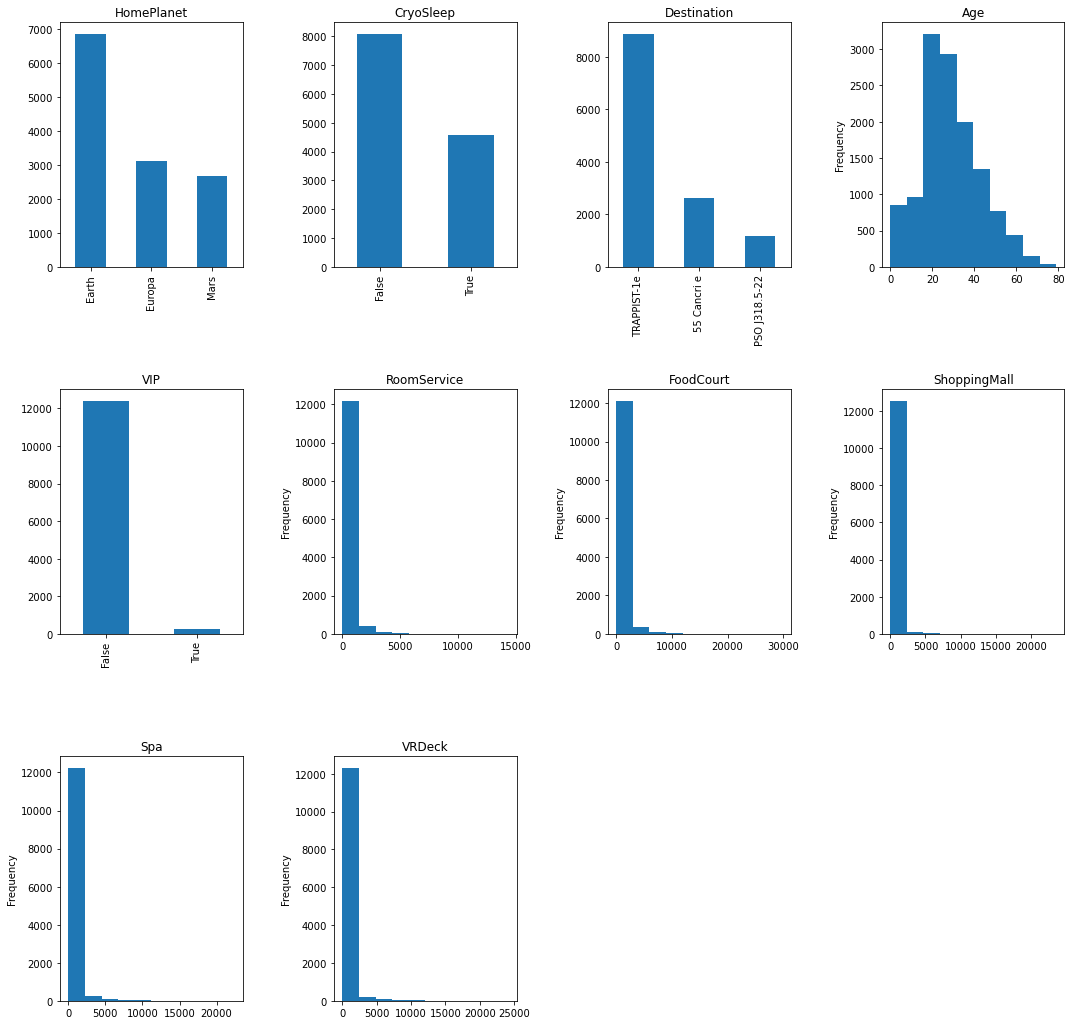

In [10]:
check_feature_num = all_dataset.shape[1]
row_num = 4
col_num = int(check_feature_num / row_num)
ax_num = 0
fig = plt.figure(figsize=(18, 6 * col_num))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for index, col in enumerate(all_dataset.columns):
    if all_dataset[col].dtype == "category" or all_dataset[col].dtype == "boolean":
        num_of_category = all_dataset[col].value_counts().shape[0]
        if num_of_category > 10:
            print(f"{col} has too many features({num_of_category})!!")
            continue
        ax = fig.add_subplot(col_num, row_num, ax_num + 1)
        ax.set_title(col)
        all_dataset[col].value_counts().plot(kind="bar", ax=ax)
        ax_num += 1
    elif all_dataset[col].dtype == "float":
        ax = fig.add_subplot(col_num, row_num, ax_num + 1)
        ax.set_title(col)
        all_dataset[col].plot(kind="hist", ax=ax)
        ax_num += 1
    
plt.show()

# Target distributions

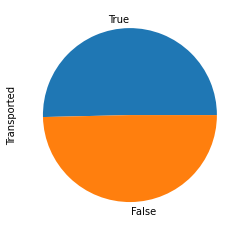

In [11]:
train["Transported"].value_counts().plot(kind="pie")
plt.show()